# Dataset Information

The dataset is provided by UCI Machine Learning via Kaggle at https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset. The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content:

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=properly paid on time, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

# Load the data and required libraries

In [2]:
# Let's first explore the data. Before we load the data, load all required libraries
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


#Load the CSV file into dataframeb
payment_data = pd.read_csv('data/UCI_Credit_Card.csv')
payment_data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Exploratory Data Analysis

In [3]:
#Some more visual checking
payment_data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
payment_data.shape

(30000, 25)

In [5]:
payment_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [7]:
print(payment_data['LIMIT_BAL'].min())
print(payment_data['LIMIT_BAL'].max())
print(payment_data['AGE'].min())
print(payment_data['AGE'].max())

10000.0
1000000.0
21
79


In [8]:
#Is there any data missing?
total_missing_records = payment_data.isnull().sum().sort_values(ascending = False)
percent_missing_records = (payment_data.isnull().sum()/payment_data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total_missing_records, percent_missing_records], axis=1, keys=['Total Missing', 'Percent Missing']).transpose()

,default.payment.next.month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
payment_data.groupby('default.payment.next.month').count()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,...,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,...,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


# Observations from above data exploration

* There are 30,000 records in the dataset.
* Balance limit range from 10,000 to 1 million!
* Customers' age range from 21 to 79. Average age is 35.
* In the dataset given, 28% defaulted on the payment. That's much larger than 2.54% delinquency rate on credit card debt for all commercial banks in U.S.
* In terms of the target value (default.payment.next.month), the data is unbalanced.

In [10]:
payment_data.groupby('EDUCATION').count()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585,...,10585,10585,10585,10585,10585,10585,10585,10585,10585,10585
2,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030,...,14030,14030,14030,14030,14030,14030,14030,14030,14030,14030
3,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917,...,4917,4917,4917,4917,4917,4917,4917,4917,4917,4917
4,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
5,280,280,280,280,280,280,280,280,280,280,...,280,280,280,280,280,280,280,280,280,280
6,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


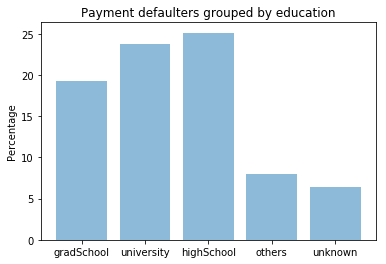

In [11]:
# Make a bar chart to understand if higher education equals to less default. Meaning that highly educated people earn more, 
# thus less chance of defaulting on credit card payment. Let's see if that assumption is true. 

import numpy as np

# EDUCATION column values 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=unknown 
# (0 is not given in the instructions) -- group all unknowns together

education_unknown = 0
education_graduate = 0
education_university = 0
education_highschool = 0
education_others = 0
default_unknown = 0
default_graduate = 0
default_university = 0
default_highschool = 0
default_others = 0

for index, row in payment_data.iterrows():    
    if (row['EDUCATION'] == 5):
            education_unknown+=1
            if (row['default.payment.next.month'] == 1):
                default_unknown+=1
    elif (row['EDUCATION'] == 1):
            education_graduate+=1
            if (row['default.payment.next.month'] == 1):
                default_graduate+=1
    elif (row['EDUCATION'] == 2):
            education_university+=1
            if (row['default.payment.next.month'] == 1):
                default_university+=1
    elif (row['EDUCATION'] == 3):
            education_highschool+=1
            if (row['default.payment.next.month'] == 1):
                default_highschool+=1
    else:
            education_others+=1
            if (row['default.payment.next.month'] == 1):
                default_others+=1

default_percentage_graduate = (default_graduate/education_graduate) * 100
default_percentage_university = (default_university/education_university) * 100
default_percentage_highschool = (default_highschool/education_highschool) * 100
default_percentage_others = (default_others/education_others) * 100
default_percentage_unknown = (default_unknown/education_unknown) * 100

education_level = ('gradSchool', 'university', 'highSchool', 'others', 'unknown')
y_pos = np.arange(len(education_level))
default_payment_percentage = (default_percentage_graduate, default_percentage_university, default_percentage_highschool, default_percentage_others, default_percentage_unknown)
 
plt.bar(y_pos, default_payment_percentage, align='center', alpha=0.5)
plt.xticks(y_pos, education_level)
plt.ylabel('Percentage')
plt.title('Payment defaulters grouped by education')
plt.show()

Findings from bar chart: Interestingly less educated people were more prompt in paying credit card bills!

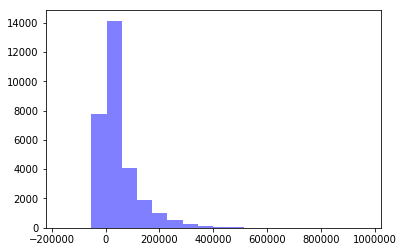

In [12]:
# Let's try histogram of one bill amount to see if it provides any insights
x = payment_data['BILL_AMT1']
num_bins = 20
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

No insights from above histogram. Same for other bill amounts as well. 

Let's try the density plot on credit limit (LIMIT_BAL). A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation (SDE). seaborn has function to plot the density plot with KDE. 

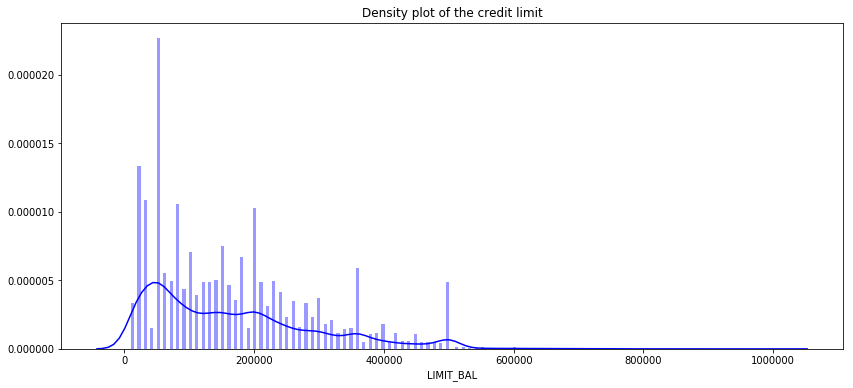

In [13]:
plt.figure(figsize = (14,6))
plt.title('Density plot of the credit limit')
sns.set_color_codes("pastel")
sns.distplot(payment_data['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Can we predict if a person is late in April would be most probably late in September as well? Let's check it out!

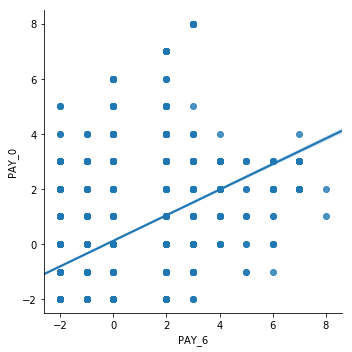

In [81]:
# Compare PAY_6 (payment status in April 2005) with PAY_0 (payment status in September 2005)

# Plot a linear regression
sns.lmplot(x='PAY_6', y='PAY_0', data=payment_data)

# Display the plot
plt.show()

There is no definite correlation between repayment status in April vs September. However, we can interpret from above chart that most of the customers who were late in payment in April 2005 were late in September 2005 as well. 

{'whiskers': [<matplotlib.lines.Line2D at 0x233e02a52e8>,
 'caps': [<matplotlib.lines.Line2D at 0x233e02a5828>,
 'boxes': [<matplotlib.lines.Line2D at 0x233e02a50f0>],
 'medians': [<matplotlib.lines.Line2D at 0x233e0135a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x233e0135550>],
 'means': []}

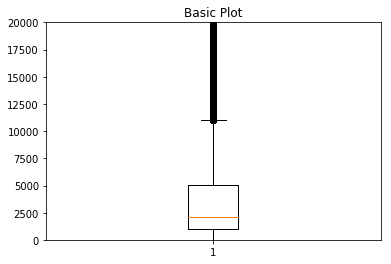

In [82]:
# Draw boxplot on couple of payment amounts to see if there is any pattern 

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x233e00598d0>,
 'caps': [<matplotlib.lines.Line2D at 0x233e00a8e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x233e0059978>],
 'medians': [<matplotlib.lines.Line2D at 0x233e00a8e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x233e00a8668>],
 'means': []}

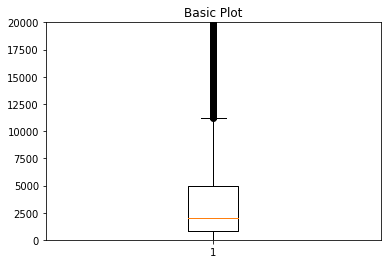

In [83]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x233e1007ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x233e02ae278>,
 'boxes': [<matplotlib.lines.Line2D at 0x233e10077f0>],
 'medians': [<matplotlib.lines.Line2D at 0x233e02ae630>],
 'fliers': [<matplotlib.lines.Line2D at 0x233e02ae978>],
 'means': []}

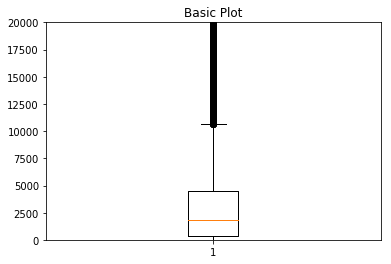

In [84]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.set(ylim=(10, 20000))
ax1.boxplot(payment_data['PAY_AMT3'])

Boxplots for pay_amt1. pay_amt2 and pay_amt3 look same in terms of non-outliers. 
I suspect that it's going to look the same for other pay_amt

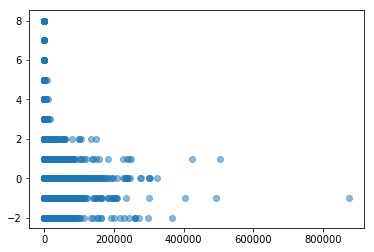

In [85]:
# Draw Scatterplot for payment status in September vs payment amount in September

# PAY_0: Repayment status in September, 2005 (-1=properly paid on time, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)
    
x = payment_data['PAY_AMT1']
y = payment_data['PAY_0']

plt.scatter(x, y, alpha=0.5)
plt.show()

As shown above when a customer pays less amount in a given month (especially less than 100,000 NT dollars), payment delays for that month goes up. This leads to an assumption that when the customer pays the card in full, there is less possibility of customer defaulting next month. It's only a speculation. There is no concrete evidence from above chart. 

Let's do a variation of above exercise to check if the variables PAY_0 and PAY_AMT1 are correlated. 

Null Hypothesis: There is no relationship between "PAY_AMT1" and "PAY_0". Alternate Hypothesis: There is a relationship between these two variables.

Significance Level: 99.9% Confidence (alpha = 0.01)

In [86]:
r, pvalue = stats.pearsonr(payment_data['PAY_AMT1'], payment_data['PAY_0'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis. There is a relationship between PAY_0 and PAY_AMT1')

Correlation: -0.0793,  p-value: 5.04e-43
Reject the Null Hypothesis. There is a relationship between PAY_0 and PAY_AMT1


Let's repeat the above experiment for PAY_2 and PAY_AMT2 and also for PAY_3 and PAY_AMT3

In [87]:
r, pvalue = stats.pearsonr(payment_data['PAY_AMT2'], payment_data['PAY_2'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis. There is a relationship between PAY_2 and PAY_AMT2')

Correlation: -0.0590,  p-value: 1.52e-24
Reject the Null Hypothesis. There is a relationship between PAY_2 and PAY_AMT2


In [88]:
r, pvalue = stats.pearsonr(payment_data['PAY_AMT3'], payment_data['PAY_3'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis. There is a relationship between PAY_3 and PAY_AMT3')

Correlation: -0.0533,  p-value: 2.47e-20
Reject the Null Hypothesis. There is a relationship between PAY_3 and PAY_AMT3


Based on above examples, payment amount for previous month is correlated with repayment status for current month. 

In [89]:
r, pvalue = stats.pearsonr(payment_data['LIMIT_BAL'], payment_data['default.payment.next.month'])
print('Correlation: {:0.4f},  p-value: {:0.2e}'.format(r, pvalue))

# Print interpretation:
alpha = 0.01
if pvalue > alpha:
    print('Fail to Reject the Null Hypothesis.')
else:
    print('Reject the Null Hypothesis. There is a relationship between credit limit and defaulting on next month payment')

Correlation: -0.1535,  p-value: 1.30e-157
Reject the Null Hypothesis. There is a relationship between credit limit and defaulting on next month payment


Let's try the heatmap to understand the correlation between various fields and defaulting for next month payment. 

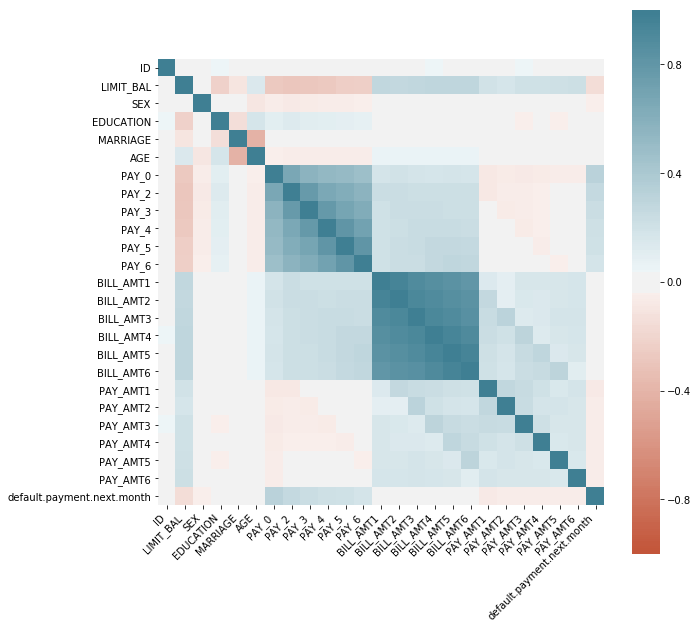

In [90]:
corr = payment_data.corr()
plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Scanning thru the diagram, it's obvious that we can remove the fields (like ID) which has no correlation at all with other variables. From the above heatmap, it appears that default.payment.next.month is strongly correlating with only PAY_x fields.

Let's create another dataframe with only the desired columns.

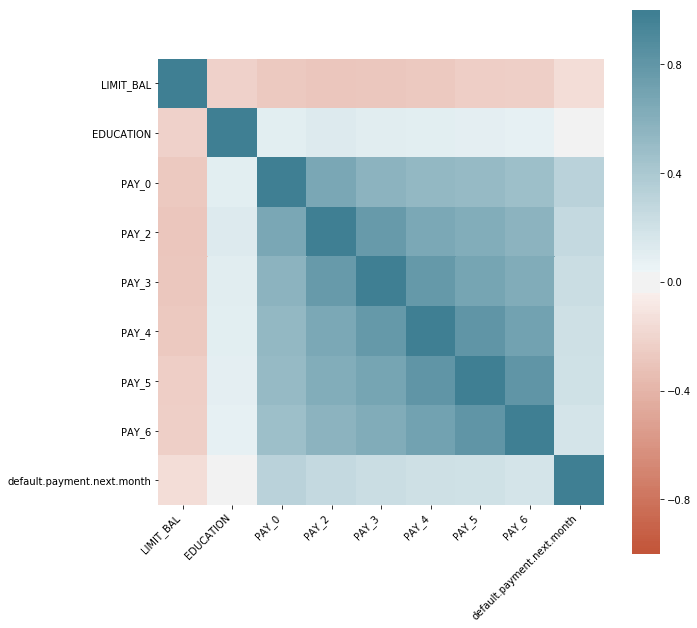

In [91]:
columns = ['LIMIT_BAL', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month'] 

corr = payment_data[columns].corr()
plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Based on the heatmap above, we can conclude that repayment status is the most reliable indicator of defaulting on payment next month. 

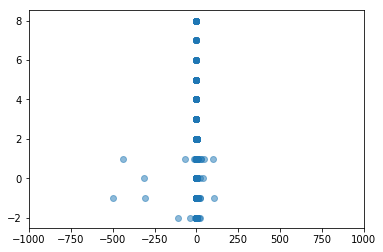

In [92]:
#PAY_0 - Repayment status in September 2005
#BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

x = payment_data['PAY_AMT1'] / payment_data['BILL_AMT2']
y = payment_data['PAY_0']

plt.scatter(x, y, alpha=0.5)
plt.xlim(-1000, 1000)
plt.show()

If a customer pays less than what he/she owes, does it indicate the possibility of default in current month? Looking at the chart above, it does not give any indication of that. 

# Supervised Learning -- Predict the default using various predictive models

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from datetime import datetime 
import gc

In [16]:
# Function to plot the feature importances of various models
def plot_feature_importances(model):
    # model.feature_importances_ gives the numeric array of feature importance; let's plot that for better visualization
    featureImportance = pd.DataFrame({'Feature': independent_variables, 'Feature importance': model.feature_importances_})
    featureImportance = featureImportance.sort_values(by='Feature importance', ascending=False)
    plt.figure(figsize = (7,4))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature', y='Feature importance', data=featureImportance)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show()   

## 1. Random Forest Classifier

In Random Forest, each tree is built from bootstrap sample. Then, the average score is taken. Random Forest models decide where to split based on a random selection of features. Rather than splitting at similar features at each node throughout, Random Forest models implement a level of differentiation because each tree will split based on different features. This approach helps random forest to provide more accurate prediction.

Before we apply random forest classifier to credit card data, it would be ideal to "one hot encode" category features like data in EDUCATION column. This column has values such as 1=graduate school, 2=university, 3=high school, etc., We don't want the classifier to assume value "1" in EDUCATION is better than value "3". Let's use pandas get_dummies to accomplish one hot encoding.  

In [17]:
cat_features = ['EDUCATION', 'SEX', 'MARRIAGE']

In [18]:
# Backup payment_data, just in case
payment_data_bkup = payment_data.copy()

In [19]:
payment_data = pd.get_dummies(payment_data, columns = cat_features)

In [20]:
payment_data.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_1,SEX_2,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0,0,0,0,0,1,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,0,0,0,0,0,1,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,0,0,0,0,0,1,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,0,0,0,0,0,1,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,0,0,0,0,1,0,0,1,0,0


In [21]:
target = 'default.payment.next.month'
independent_variables = ['LIMIT_BAL', 'SEX_1', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
                       'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [22]:
# Split training and test dataset
# Arranging independent and target variables into X and y as standard
X = payment_data[independent_variables]
y = payment_data[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [23]:
# Instantiate the random forest classifier
clf = RandomForestClassifier(n_jobs=4, 
                             n_estimators=100,
                             random_state=42)

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
# Predict the target value for test data records
predicted_values = clf.predict(X_test)

In [13]:
# Calculate area under curve using predicted_values and target values available in test data
roc_auc_score(y_test, predicted_values)

0.6554958278123281

Note: I tested the roc_auc_score without one hot encoding categorical features. There is no significant change in roc_auc_score with or without one hot encoding. (The difference is negligible)

In [14]:
# Calculate Train and Test Accuracy -- How good is the prediction rate for training and test data sets?
print ("Train Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, predicted_values))

Train Accuracy:  0.9995555555555555
Test Accuracy:  0.815


Training set gave us 99.9% accuracy whereas test set gave us 81.5% accuracy. 

In [15]:
# Print confusion matrix - It provides the true positive, true negative, false positive and false negative
confusion_matrix(y_test, predicted_values)

array([[8801,  556],
       [1664,  979]], dtype=int64)

We got false positive as 1664 which is concerning. (True positive is 8801). We would need to try other models to see if we can improve accuracy and true positives.

Let's check the "Feature Importance" -- What features are considered important by random forest classifier?

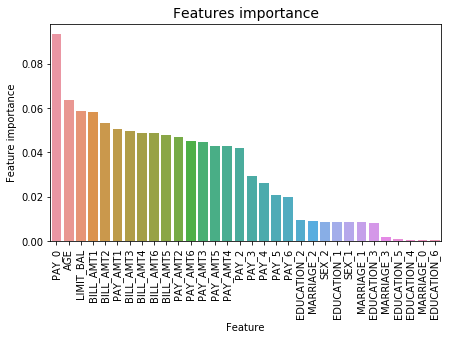

In [16]:
plot_feature_importances(clf)

Random forest classifier identified PAY_0, Age, credit limit, BILL_AMT1 and BILL_AMT2 as most important features to predict if the customer would default next month. It should also be noted that almost all features are given some importance; Education, gender and marital status are given low importance.

## 2. K-Nearest Neighbors

Let's evaluate K-Nearest Neighbors model to predict the default. Remember X and y are already defined with independent and target variables. 

In [24]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.7613333333333333


I have chosen 7 as n_neighbors. Is that a optimal value? Let's check it by comparing accuracy for various n_neighbors

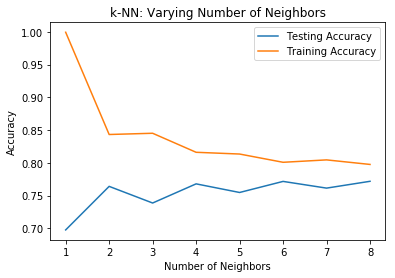

In [33]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Based on above chart, 4 is slightly better in terms of both training and test accuracies. Let's modify n_neighbors to 4 and see what happens. 

In [34]:
# Create a k-NN classifier with 4 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [35]:
print ("Train Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, knn.predict(X_test)))

Train Accuracy:  0.8160555555555555
Test Accuracy:  0.7678333333333334


In [36]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [37]:
roc_auc_score(y_test, y_pred_proba)

0.5980482847237195

Test accuracy is slightly better at 0.7678 compared to 0.7613 for n_neighbors = 7. 

Is looking at the graph and finding n_neighbors a good idea? OR use GridSearchCV to find the best param? Let's try GridSearchCV.

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
knn_cv.best_score_

0.7726

In [28]:
knn_cv.best_params_

{'n_neighbors': 8}

In [38]:
# Create a k-NN classifier with 8 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [39]:
print ("Train Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))
print ("Test Accuracy: ", accuracy_score(y_test, knn.predict(X_test)))

Train Accuracy:  0.7975
Test Accuracy:  0.77175


In [40]:
confusion_matrix(y_test, knn.predict(X_test))

array([[9023,  323],
       [2416,  238]], dtype=int64)

In [32]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [33]:
roc_auc_score(y_test, y_pred_proba)

0.6180921206997954

We have some improvement in test accuracy and AUC score, although train accuracy went down a little bit. 

## 3. Logistic Regression

Linear regression is good technique to deal with continuous random variables. But, to solve classification problems like default or no-default, logistic regression is better approach. Let's build the logistic regression model to predict the default. 

In [322]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(solver='newton-cg', max_iter=100)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9066  291]
 [2010  633]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      9357
           1       0.69      0.24      0.35      2643

   micro avg       0.81      0.81      0.81     12000
   macro avg       0.75      0.60      0.62     12000
weighted avg       0.79      0.81      0.77     12000



C:\Users\rammu_000\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [323]:
roc_auc_score(y_test, logreg.predict(X_test))

0.6042004280454568

In [324]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.810
Test set score: 0.808


default solver "lbfgs" gave zero true negative and zero false negative, which is not acceptable! Changing solver to newton-cg improved the predictions and also got decent test set score. But, got the warning "newton-cg failed to converge, increase the number of iterations". Increasing the number of iterations from default 100 does not make any difference in prediction. 

I believe that the logistic regression is not the best model to solve this problem. 

## 4. Linear Regression

For learning purposes, let me try linear regression. As mentioned above, linear regression is not a good model for classification problems. Let's see what the accuracy using this model.

In [190]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print Score and RMSE
print("Score: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Score: 0.11652169092719089
Root Mean Squared Error: 0.3879446807310727


Score is so low! It's proven that Linear Regression is not a good model for classification problems.

## 5. Decision Tree Classifier

In [325]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.824
Accuracy on test set: 0.819


In [326]:
roc_auc_score(y_test, tree.predict(X_test))

0.6493477504638219

Decision tree classifier also gives a good test set accuracy with max_depth (maximum depth of the tree) of 4. However, training set accuracy is compromised because of max_depth=4 setting. 

If max_depth is left at default (equal to None), training set accuracy is 1, test set accuracy comes down to 0.72

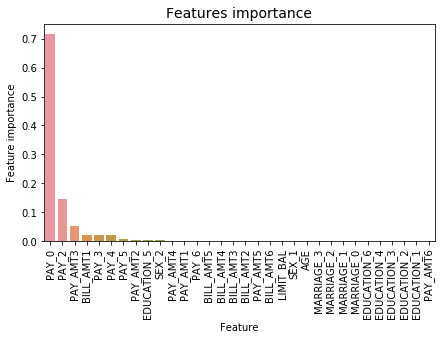

In [205]:
# What features are considered important by Decion tree classifier?
plot_feature_importances(tree)

It's interesting to note that Decision tree classifier identifies only few variables as important compared to Random forest classifier. Decision tree classifier gives very high weightage to PAY_0.

## 6. Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Main difference between decision tree and bagging classifiers is that bagging has randomization in its data subset construction procedure.

In [327]:
from sklearn.ensemble import BaggingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(bag_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bag_clf.score(X_test, y_test)))

Accuracy on training set: 0.980
Accuracy on test set: 0.806


In [328]:
roc_auc_score(y_test, bag_clf.predict(X_test))

0.6410801252319109

## 7. GradientBoosting Classifier

The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. This model can be used for both regression and classification. 

In [218]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.829
Accuracy on test set: 0.821


In [219]:
roc_auc_score(y_test, gbrt.predict(X_test))

0.6587756779054378

It's interesting to note that GradientBoosting almost matches Random Forest classifier performance in terms of test set accuracy and AUC score. Random forest has better training set accuracy (99%). 

What features are considered important by Gradient Boosting?

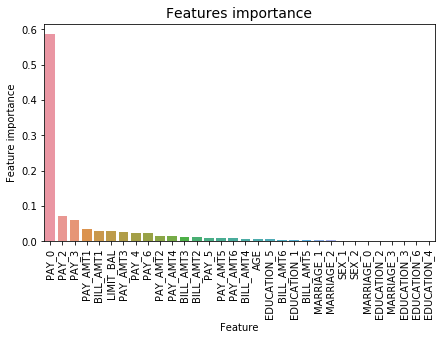

In [220]:
plot_feature_importances(gbrt)

Gradient boosting classifier behaves the same way as Decision tree classifier in terms of feature importance -- providing very high weightage to just one variable PAY_0.

## 8. Support Vector Machines

In [329]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.780


In [227]:
roc_auc_score(y_test, svc.predict(X_test))

0.50545859249153

## 9. XGBoost

In [284]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [330]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [331]:
param_dist = {'objective':'binary:logistic', 'n_estimators':3, 'verbosity':0}

xgb_clf = xgb.XGBClassifier(**param_dist)

xgb_clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.650565	validation_1-logloss:0.65068
[1]	validation_0-logloss:0.61583	validation_1-logloss:0.61608
[2]	validation_0-logloss:0.5872	validation_1-logloss:0.587678


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=3, n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=0)

In [332]:
print("Accuracy on training set: {:.3f}".format(xgb_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb_clf.score(X_test, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.821


In [333]:
roc_auc_score(y_test, xgb_clf.predict(X_test))

0.6500449327458256

## Parameter tuning for XGBoost

Let's try GridSearchCV to find optimal values for max_depth (Maximum tree depth for base learners) and min_child_weight (Minimum sum of instance weight(hessian) needed in a child node).

Running first pass thru GridSearchCV

In [299]:
# Setting ranges for required parameters to be tuned
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X, y)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.7813436262006352)

We got ideal max_depth as 3 and ideal min_child_weight as 5. Let's apply those and run XGBClassifier again

In [300]:
param_dist = {'objective':'binary:logistic', 'n_estimators':3, 'max_depth': 3, 'min_child_weight': 5, 'verbosity':0}

xgb_clf = xgb.XGBClassifier(**param_dist)

xgb_clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.650629	validation_1-logloss:0.650675
[1]	validation_0-logloss:0.61606	validation_1-logloss:0.616212
[2]	validation_0-logloss:0.587484	validation_1-logloss:0.587816


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=3, n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=0)

In [301]:
print("Accuracy on training set: {:.3f}".format(xgb_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb_clf.score(X_test, y_test)))

Accuracy on training set: 0.822
Accuracy on test set: 0.821


In [302]:
roc_auc_score(y_test, xgb_clf.predict(X_test))

0.6549994377399839

Running second pass thru GridSearchCV using slightly different values (ideal value found above, ideal-1, ideal+1)

In [305]:
param_test2 = {
 'max_depth':[3,4,5],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X, y)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4, 'min_child_weight': 5}, 0.7825758757065872)

In [306]:
param_dist = {'objective':'binary:logistic', 'n_estimators':3, 'max_depth': 4, 'min_child_weight': 5, 'verbosity':0}

xgb_clf = xgb.XGBClassifier(**param_dist)

xgb_clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)

[0]	validation_0-logloss:0.649625	validation_1-logloss:0.650236
[1]	validation_0-logloss:0.614294	validation_1-logloss:0.6153
[2]	validation_0-logloss:0.585008	validation_1-logloss:0.586556


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=5, missing=None,
       n_estimators=3, n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=0)

In [307]:
print("Accuracy on training set: {:.3f}".format(xgb_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(xgb_clf.score(X_test, y_test)))

Accuracy on training set: 0.825
Accuracy on test set: 0.822


In [308]:
roc_auc_score(y_test, xgb_clf.predict(X_test))

0.6553200533219012

Training/Test set accuracy and AUC score is slightly improved by using max_depth as 4 and min_child_weight as 5. Let's keep these values as final values for this classifier. 

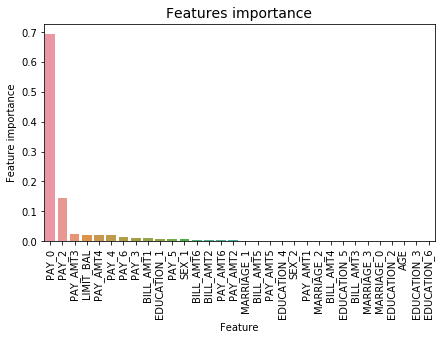

In [310]:
plot_feature_importances(xgb_clf)

XGBoost also treats PAY_0 as the single most important feature

## 10. Neural Networks -- Multi-layer Perceptron classifier

Multi-layer Perceptron (MLP) classifiers can be viewed as generalization of linear models that run multiple stages of processing to come to a decision.

In [334]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.472
Accuracy on test set: 0.465


Accuracy from MLP is not very good. The main reason is that MLP expects all input features to vary in a similar way. Meaning that having same variance (ideally 1) and to have a mean of 0. Let's rescale the data to meet this requirement.

In [335]:
# compute the mean value per feature on the training data
mean_on_train = X_train.mean(axis=0)

# compute the standard deviation of each feature on the training data
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

Now, apply MLP on scaled training data.

In [336]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.821
Accuracy on test set: 0.819


In [337]:
roc_auc_score(y_test, mlp.predict(X_test_scaled))

0.6421266233766234

The accuracy and AUC are much improved. Neural networks are ideal for very large data processing. Comparing to all other models we used, neural networks took much longer time to process the data and provide predictions. 

# Summary

I studied the dataset that contains the information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. The goal is to predict if the customer is going to default on the credit card payment next month. This is a typical classification problem. 

First, I did exploratory data analysis on the data, studied correlation between variables, plotted heatmaps and graphs, and observed some interesting facts. Then, I applied 10 different machine learning models and measured the training and test accuracy, AUC score, etc., 

Random Forest Classifier: training accuracy 0.999, test accuracy 0.815, AUC score 0.6555

K-Nearest Neighbors Classifier: training accuracy 0.7975, test accuracy 0.7717, AUC score 0.6181

Logistic Regression: training accuracy 0.810, test accuracy 0.808, AUC score 0.6042

Linear Regression: AUC score 0.1165

Decision Tree Classifier: training accuracy 0.824, test accuracy 0.819, AUC score 0.6493

Bagging Classifier: training accuracy 0.980, test accuracy 0.806, AUC score 0.6410

GradientBoosting classifier: training accuracy 0.829, test accuracy 0.821, AUC score 0.6587

SVM: training accuracy 0.994, test accuracy 0.780, AUC score 0.5054

XGBoost Classifier: training accuracy 0.825, test accuracy 0.822, AUC score 0.6553

Neural Networks: training accuracy 0.821, test accuracy 0.819, AUC score 0.6421

All classifiers except SVM and Linear Regression performed well. In terms of performance, SVM and Neural Networks took much longer time to process and predict. 

In terms of prediction accuracy and AUC score, GradientBoosting classifier and XGBoost classifier performed well. Random forest classifier comes close. 

Although Neural Networks comes close in terms of performance, it takes much longer time to process the data compared to other classifiers I have tested.